In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [3]:
current_path = os.getcwd()

In [5]:
os.chdir('..')

In [6]:
os.chdir('/Users/kuldeepchinwan/Projects/ML_Projects/Gurugram_house_Prediction/Data')

In [7]:
os.getcwd()

'/Users/kuldeepchinwan/Projects/ML_Projects/Gurugram_house_Prediction/Data'

In [8]:
#reading house dataset extracted information from 99 acres.com 
data_class = pd.read_csv('houses.csv')

In [9]:
data_class.head()

,property_name,link,society,price,rate,area,areaWithType,bedRoom,bathroom,balcony,...,address,noOfFloor,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id
0,5 Bedroom House for sale in Sector 70A Gurgaon,https://www.99acres.com/5-bhk-bedroom-independ...,Bptp Visionnaire,5.25 Crore,"₹ 20,115/sq.ft.",(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),5 Bedrooms,4 Bathrooms,3+ Balconies,...,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",3 Floors,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...",Do you wish to buy an independent house in sec...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5...",K70037724
1,5 Bedroom House for sale in Sector 21A Faridabad,https://www.99acres.com/5-bhk-bedroom-independ...,NaN,5.7 Crore,"₹ 105,751/sq.ft.",(50 sq.m.) Plot Area,Plot area 539(50.07 sq.m.),5 Bedrooms,4 Bathrooms,2 Balconies,...,"Sector 21A Faridabad, Gurgaon, Haryana",2 Floors,NaN,5 to 10 Year Old,NaN,"Hi, we have an independent house/villa availab...","['1 Water Purifier', '5 Fan', '1 Exhaust Fan',...","['Private Garden / Terrace', 'Park', 'Visitor ...",NaN,E69288322
2,10 Bedroom House for sale in Sushant Lok Phase 1,https://www.99acres.com/10-bhk-bedroom-indepen...,NaN,2.1 Crore,"₹ 38,251/sq.ft.",(51 sq.m.) Plot Area,Plot area 61(51 sq.m.),10 Bedrooms,10 Bathrooms,3+ Balconies,...,"Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city cent...","Monthly rental income is rs1,40,000/- Best opt...","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'N...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5...",F69536898
3,21 Bedroom House for sale in Sector 54 Gurgaon,https://www.99acres.com/21-bhk-bedroom-indepen...,NaN,5 Crore,"₹ 43,066/sq.ft.",(108 sq.m.) Plot Area,Plot area 129(107.86 sq.m.),21 Bedrooms,21 Bathrooms,3+ Balconies,...,"Sector 54 Gurgaon, Gurgaon, Haryana",5 Floors,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chow...","129 sq yd plot size. 5 floors built up , fully...","['1 Water Purifier', '21 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle5 out of 5...",R69483164
4,12 Bedroom House for sale in Sushant Lok Phase 1,https://www.99acres.com/12-bhk-bedroom-indepen...,NaN,3 Crore,"₹ 53,763/sq.ft.",(52 sq.m.) Plot Area,Plot area 62(51.84 sq.m.),12 Bedrooms,12 Bathrooms,3+ Balconies,...,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,Within 6 months,"['Sector 42-43 metro station', 'Huda city cent...",Best for investment purpose. Fully furnished b...,"['1 Water Purifier', '1 Fridge', '12 Fan', '1 ...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5...",M69381272


In [10]:
data_class.columns

Index(['property_name', 'link', 'society', 'price', 'rate', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'address', 'noOfFloor', 'facing', 'agePossession', 'nearbyLocations',
       'description', 'furnishDetails', 'features', 'rating', 'property_id'],
      dtype='object')

In [11]:
data_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   property_name    1044 non-null   object
 1   link             1044 non-null   object
 2   society          453 non-null    object
 3   price            968 non-null    object
 4   rate             1005 non-null   object
 5   area             1044 non-null   object
 6   areaWithType     987 non-null    object
 7   bedRoom          987 non-null    object
 8   bathroom         987 non-null    object
 9   balcony          987 non-null    object
 10  additionalRoom   589 non-null    object
 11  address          1031 non-null   object
 12  noOfFloor        967 non-null    object
 13  facing           674 non-null    object
 14  agePossession    987 non-null    object
 15  nearbyLocations  913 non-null    object
 16  description      1036 non-null   object
 17  furnishDetails   743 non-null    

In [12]:
# Identify numerical and categorical columns dynamically
numerical_features = data_class.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data_class.select_dtypes(include=['object']).columns.tolist()


In [13]:
#Chek out the different values on the feature agePossession
unique_values = data_class['agePossession'].unique()
print(unique_values)

['0 to 1 Year Old' '5 to 10 Year Old' '1 to 5 Year Old' 'Within 6 months'
 '10+ Year Old' 'undefined' nan 'Jun 2024' 'Dec 2023' 'By 2027'
 'Under Construction' 'Oct 2024' 'By 2024' 'Dec 2024' 'Within 3 months'
 'Oct 2023' 'Jan 2024']


In [14]:
data_class.shape

(1044, 21)

Cleaning dataset

In [15]:
#drop columns
data_class = data_class.drop(columns=['link', 'property_name', 'address', 'description', 'property_id', 'society', 'additionalRoom',
                                  'facing', 'nearbyLocations', 'furnishDetails', 'features', 'rate', 'areaWithType', 'address'])

In [16]:
data_class.isnull().sum()

price             76
area               0
bedRoom           57
bathroom          57
balcony           57
noOfFloor         77
agePossession     57
rating           137
dtype: int64

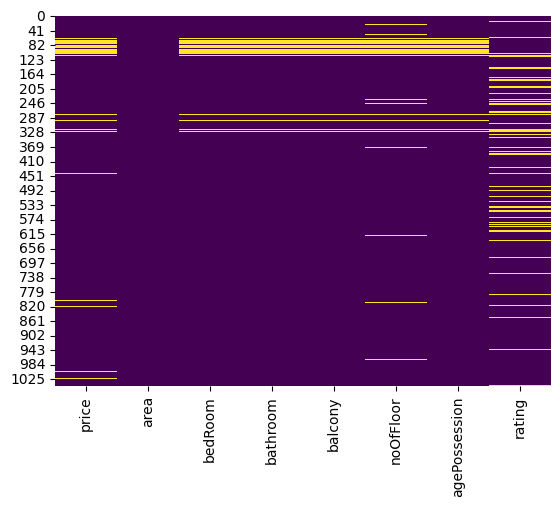

In [17]:
# Visualizing missing values
sns.heatmap(data_class.isnull(), cbar=False, cmap='viridis')
plt.show()

In [18]:
#Drop rows with Missing Values to clean datset
data_class = data_class.dropna()

In [19]:
#extarcting price from price columns 
price_df = data_class['price'].str.split(' ',expand = True)
price_df[0] = pd.to_numeric(price_df[0], errors = 'coerce')
price_df['price'] = np.where(price_df[1] == 'Lac', (price_df[0])/100, price_df[0])

In [20]:
data_class = data_class.drop(columns = ['price'])

In [21]:
data_class['price'] = price_df['price']

In [22]:
data_class['area_value'] = data_class['area'].str.extract(r'(\d+)')  # Extract the number, discard non-numeric characters

In [23]:
data_class['area_value'] = pd.to_numeric(data_class['area_value'], errors='coerce')  # convert to numeric value

In [24]:
data_class['area_type'] = data_class['area'].str.extract(r'\) (.*)')  # Extract text in ()

In [25]:
data_class = data_class.drop(columns = ['area'])

In [26]:
data_class['bedRoom'] = data_class['bedRoom'].str.replace(' Bedrooms', '')

In [27]:
data_class['bedRoom'] = pd.to_numeric(data_class['bedRoom'], errors = 'coerce')

In [28]:
data_class['bathroom'] = data_class['bathroom'].str.replace(' Bathrooms','')

In [29]:
data_class['bathroom'] = pd.to_numeric(data_class['bathroom'], errors = 'coerce')

In [30]:
data_class['noOfFloor'] = data_class['noOfFloor'].str.replace(' Floors','')

In [31]:
data_class['noOfFloor'] = pd.to_numeric(data_class['noOfFloor'], errors = 'coerce')

In [32]:
data_class['balcony_count'] = data_class['balcony'].str.extract(r'(\d+)')  
data_class['balcony_count'] = pd.to_numeric(data_class['balcony_count'], errors='coerce')

In [33]:
data_class = data_class.drop(columns = 'balcony')

In [34]:
age_mapping = {                 #create a dictionary selecting values that you want to change for the new values in a specific feature (np.nan = NA)
    '0 to 1 Year Old': 0.5,
    '1 to 5 Year Old': 2.5,
    'Within 6 months': 0,
    '5 to 10 Year Old': 7.5,
    '10+ Year Old': 12,
    'undefined': np.nan,
    'Jun 2024': 0.5,
    'Dec 2023': 1,
    'Within 3 months': 0.25,
    'Oct 2023': 1.25,
    'Jan 2024': 0.9
}

In [35]:
age_mapping

{'0 to 1 Year Old': 0.5,
 '1 to 5 Year Old': 2.5,
 'Within 6 months': 0,
 '5 to 10 Year Old': 7.5,
 '10+ Year Old': 12,
 'undefined': nan,
 'Jun 2024': 0.5,
 'Dec 2023': 1,
 'Within 3 months': 0.25,
 'Oct 2023': 1.25,
 'Jan 2024': 0.9}

In [36]:
data_class['agePossession_numeric'] = data_class['agePossession'].map(age_mapping)

In [37]:
data_class = data_class.drop(columns = ['agePossession'])

In [38]:
rating = data_class['rating'].str.split(', ',expand = True)

In [39]:
data_class['Environment_Rating'] = rating[0]

In [40]:
# Initialize empty lists
lifestyle = []
safety = []
connectivity = []

# Loop over each row (axis=1) in the DataFrame and extract values for each column
for index, row in rating.iterrows():
    # Iterate over the columns of the row
    for col in rating.columns:
        if 'Lifestyle' in row[col]:
            lifestyle.append(row[col])
        if 'Safety' in row[col]:
            safety.append(row[col])
        if 'Connectivity' in row[col]:
            connectivity.append(row[col])


In [41]:
data_class['Lifestyle_Rating'] = lifestyle
data_class['Safety_Rating'] = safety
data_class['Connectivity_Rating'] = connectivity


In [42]:
data_class['Environment_Rating'] = data_class['Environment_Rating'].str.extract(r'(\d+\.?\d*)').astype(float)  #Extracting the numeric values in the features and convert to float
data_class['Lifestyle_Rating'] = data_class['Lifestyle_Rating'].str.extract(r'(\d+\.?\d*)').astype(float)
data_class['Safety_Rating'] = data_class['Safety_Rating'].str.extract(r'(\d+\.?\d*)').astype(float)
data_class['Connectivity_Rating'] = data_class['Connectivity_Rating'].str.extract(r'(\d+\.?\d*)').astype(float)

In [43]:
data_class

,bedRoom,bathroom,noOfFloor,rating,price,area_value,area_type,balcony_count,agePossession_numeric,Environment_Rating,Lifestyle_Rating,Safety_Rating,Connectivity_Rating
0,5.0,4.0,3,"['Environment5 out of 5', 'Lifestyle4 out of 5...",5.25,242,Plot Area,3.0,0.5,5.0,4.0,4.0,4.0
2,10.0,10.0,5,"['Environment5 out of 5', 'Lifestyle5 out of 5...",2.10,51,Plot Area,3.0,0.5,5.0,5.0,5.0,5.0
3,21.0,21.0,5,"['Environment4 out of 5', 'Lifestyle5 out of 5...",5.00,108,Plot Area,3.0,2.5,4.0,5.0,4.0,4.0
4,12.0,12.0,5,"['Environment5 out of 5', 'Lifestyle5 out of 5...",3.00,52,Plot Area,3.0,0.0,5.0,5.0,5.0,5.0
5,20.0,20.0,4,"['Environment5 out of 5', 'Lifestyle5 out of 5...",4.50,107,Plot Area,3.0,2.5,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,5.0,4.0,3,"['Environment4 out of 5', 'Safety4 out of 5', ...",3.55,135,Plot Area,3.0,7.5,4.0,4.0,4.0,5.0
1035,5.0,5.0,3,"['Environment4 out of 5', 'Safety4 out of 5', ...",3.60,135,Plot Area,3.0,7.5,4.0,4.0,4.0,5.0
1036,5.0,4.0,2,"['Environment4 out of 5', 'Safety4 out of 5', ...",3.10,144,Plot Area,3.0,7.5,4.0,4.0,4.0,5.0
1037,3.0,3.0,2,"['Environment4 out of 5', 'Safety4 out of 5', ...",4.75,149,Plot Area,3.0,7.5,4.0,4.0,4.0,4.0


In [44]:
data_class = data_class.drop(columns = ['rating'])

In [45]:
data_class

,bedRoom,bathroom,noOfFloor,price,area_value,area_type,balcony_count,agePossession_numeric,Environment_Rating,Lifestyle_Rating,Safety_Rating,Connectivity_Rating
0,5.0,4.0,3,5.25,242,Plot Area,3.0,0.5,5.0,4.0,4.0,4.0
2,10.0,10.0,5,2.10,51,Plot Area,3.0,0.5,5.0,5.0,5.0,5.0
3,21.0,21.0,5,5.00,108,Plot Area,3.0,2.5,4.0,5.0,4.0,4.0
4,12.0,12.0,5,3.00,52,Plot Area,3.0,0.0,5.0,5.0,5.0,5.0
5,20.0,20.0,4,4.50,107,Plot Area,3.0,2.5,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1034,5.0,4.0,3,3.55,135,Plot Area,3.0,7.5,4.0,4.0,4.0,5.0
1035,5.0,5.0,3,3.60,135,Plot Area,3.0,7.5,4.0,4.0,4.0,5.0
1036,5.0,4.0,2,3.10,144,Plot Area,3.0,7.5,4.0,4.0,4.0,5.0
1037,3.0,3.0,2,4.75,149,Plot Area,3.0,7.5,4.0,4.0,4.0,4.0


In [46]:
data_class.dtypes

bedRoom                  float64
bathroom                 float64
noOfFloor                  int64
price                    float64
area_value                 int64
area_type                 object
balcony_count            float64
agePossession_numeric    float64
Environment_Rating       float64
Lifestyle_Rating         float64
Safety_Rating            float64
Connectivity_Rating      float64
dtype: object

In [47]:
# Identify numerical and categorical columns dynamically
numerical_features = data_class.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data_class.select_dtypes(include=['object']).columns.tolist()

In [48]:
numerical_features

['bedRoom',
 'bathroom',
 'noOfFloor',
 'price',
 'area_value',
 'balcony_count',
 'agePossession_numeric',
 'Environment_Rating',
 'Lifestyle_Rating',
 'Safety_Rating',
 'Connectivity_Rating']

In [49]:
categorical_features

['area_type']

In [51]:
data_df = data_class

In [52]:
data_df.isna().sum()

bedRoom                   29
bathroom                  46
noOfFloor                  0
price                      9
area_value                 0
area_type                  0
balcony_count             94
agePossession_numeric    133
Environment_Rating         0
Lifestyle_Rating           0
Safety_Rating              0
Connectivity_Rating        0
dtype: int64

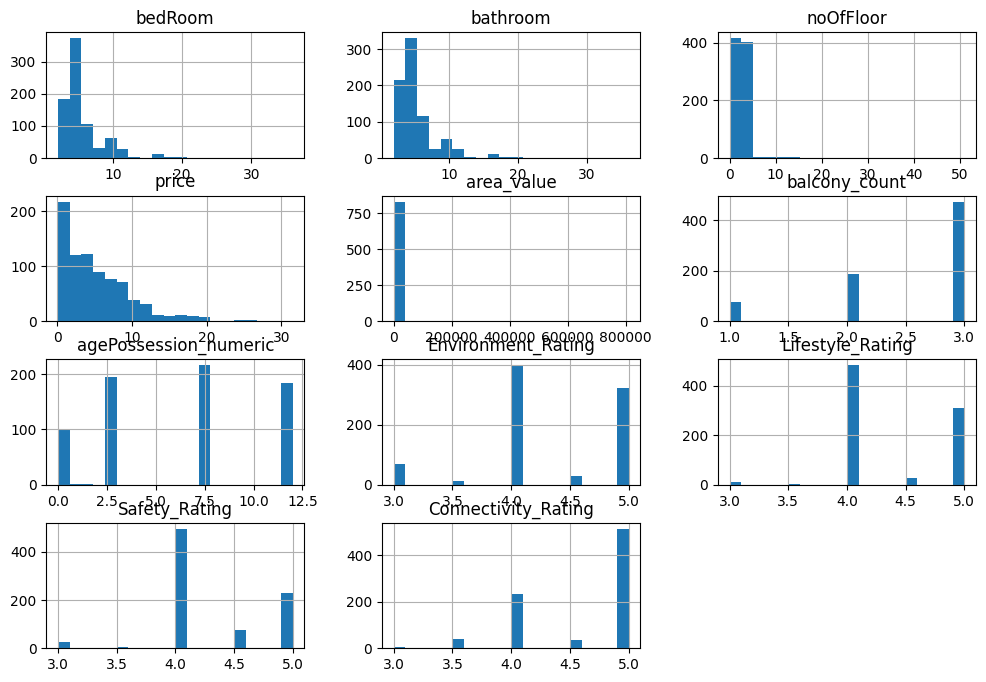

In [53]:
# Histogram for numerical features
data_df[numerical_features].hist(figsize=(12, 8), bins=20)
plt.show()

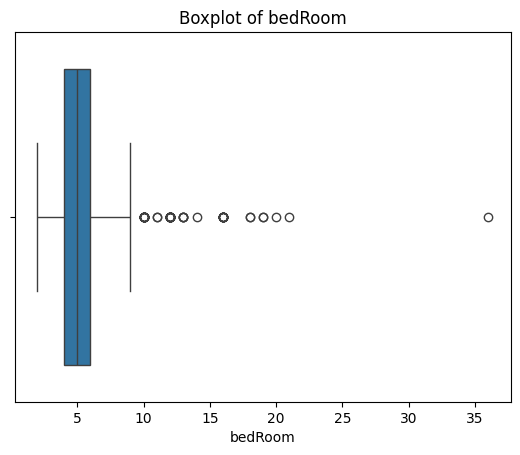

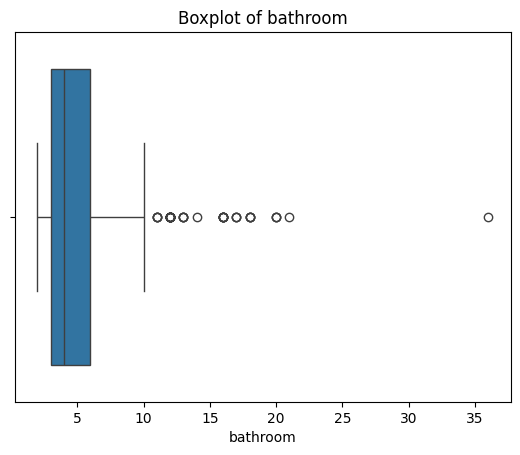

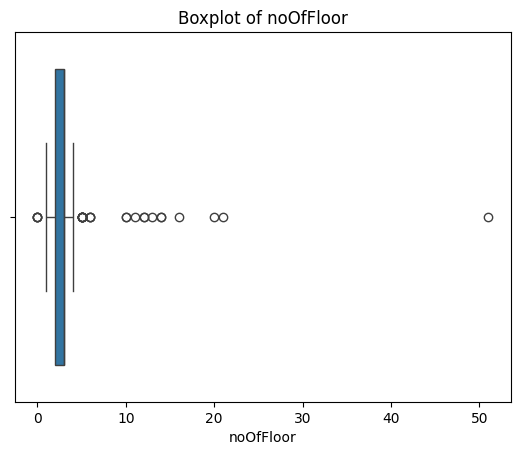

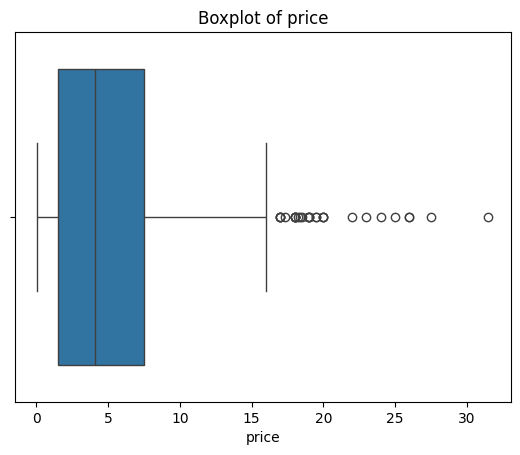

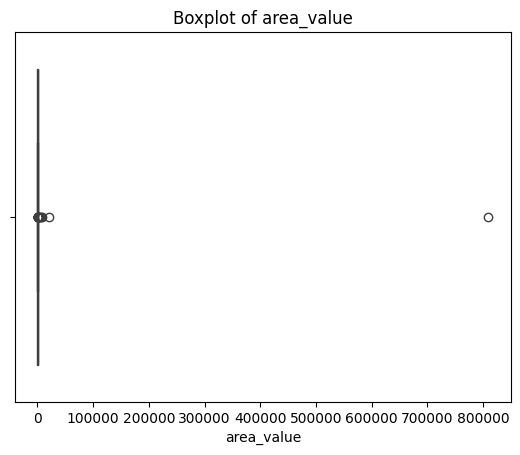

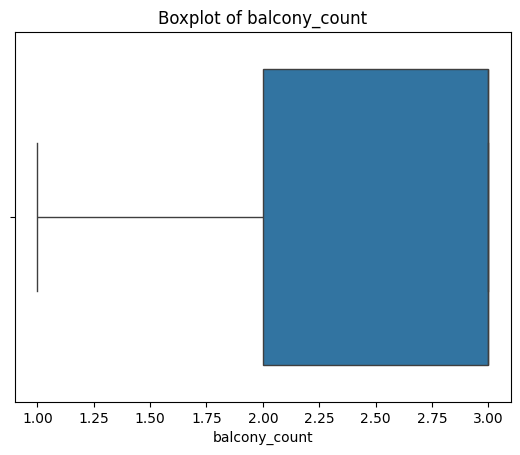

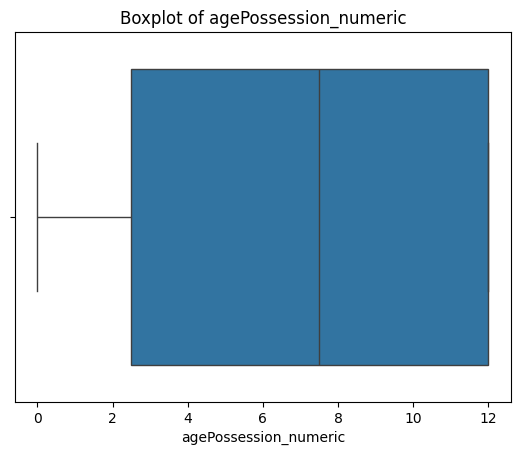

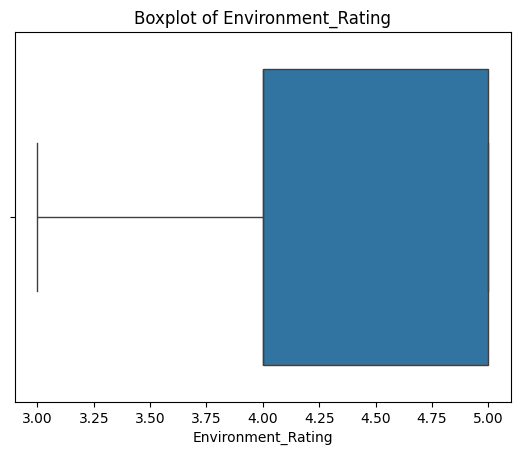

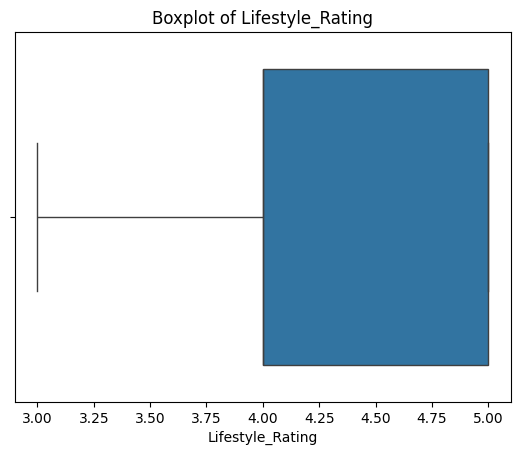

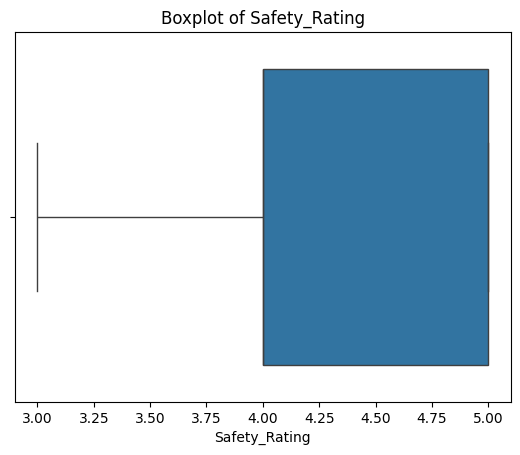

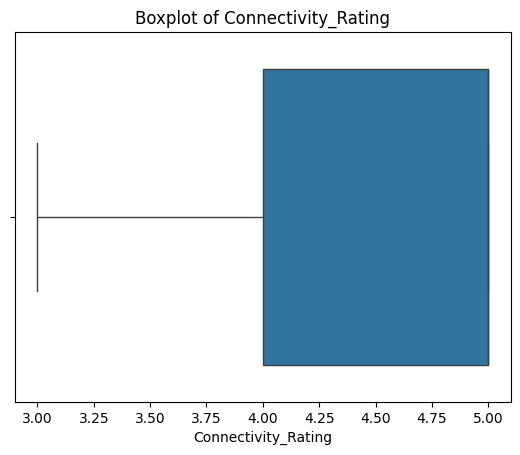

In [54]:
# Boxplots to detect outliers
for col in numerical_features:
    sns.boxplot(x=data_df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

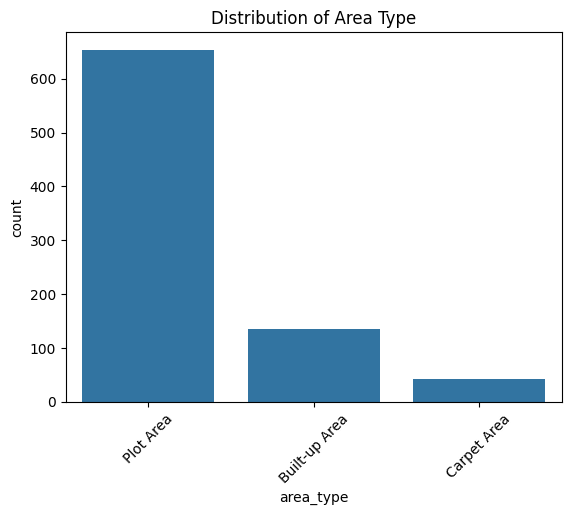

In [55]:
sns.countplot(x=data_df['area_type'])
plt.xticks(rotation=45)
plt.title("Distribution of Area Type")
plt.show()

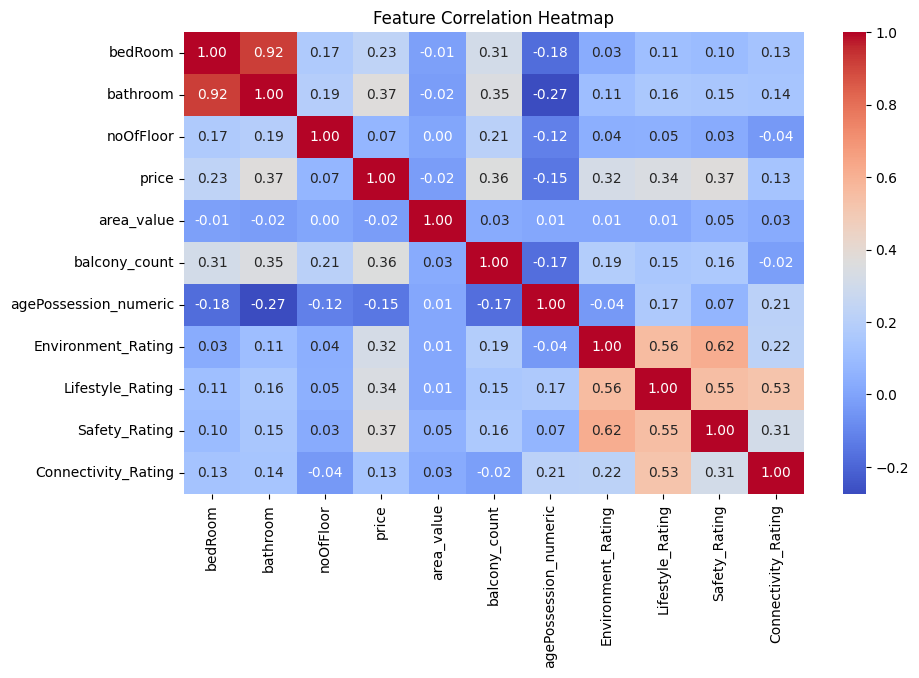

In [56]:
#heat map to show the correlation between numerical data
plt.figure(figsize=(10, 6))
sns.heatmap(data_df[numerical_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

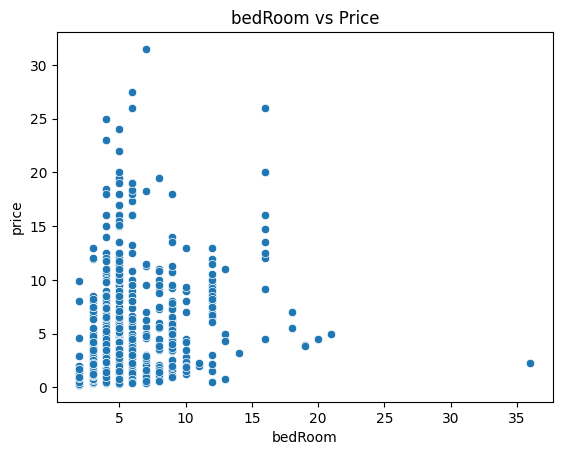

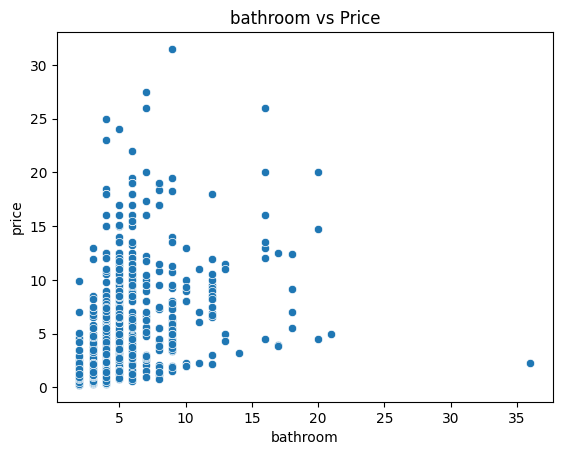

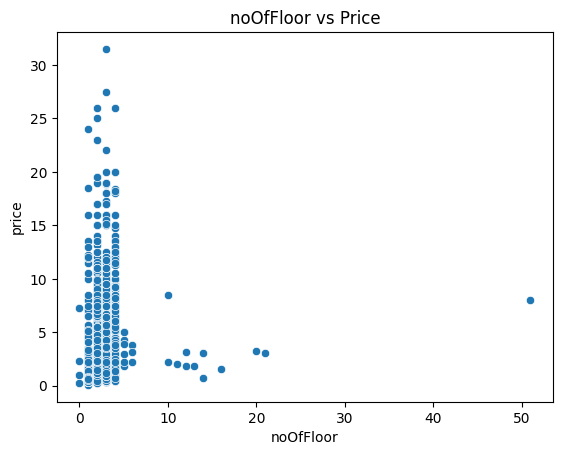

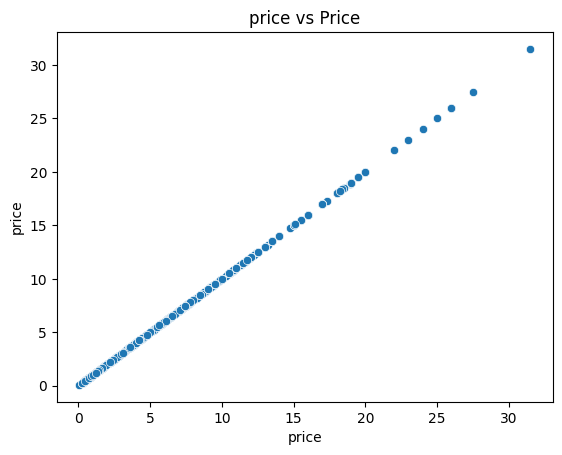

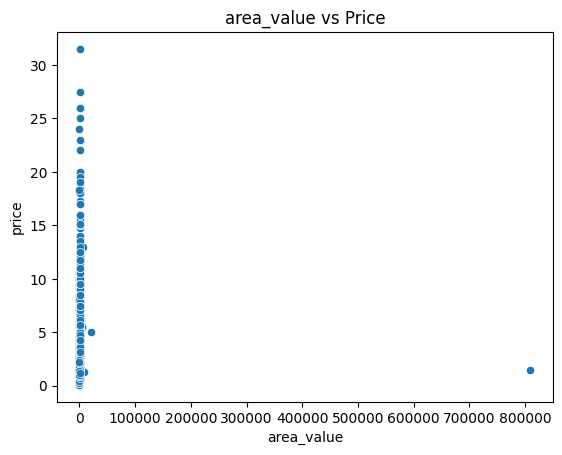

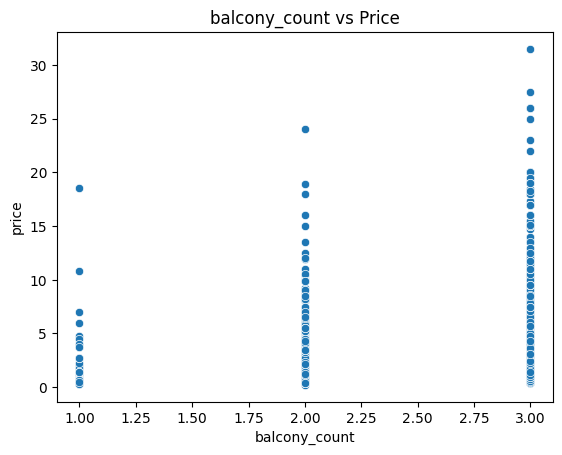

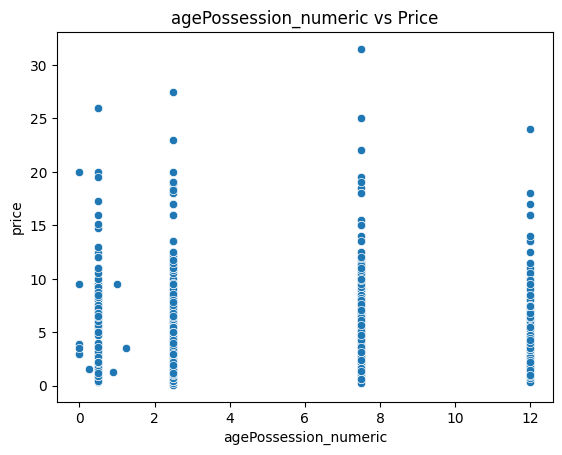

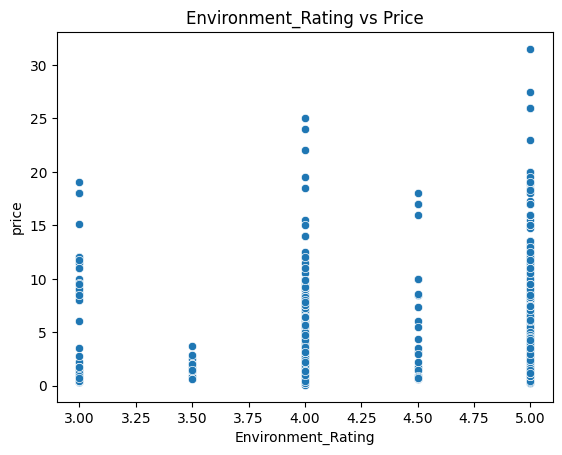

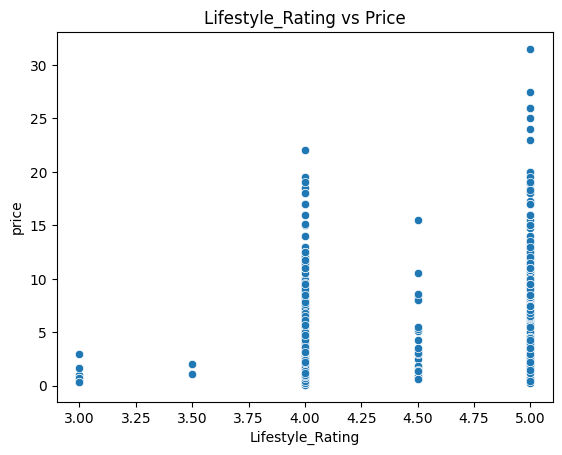

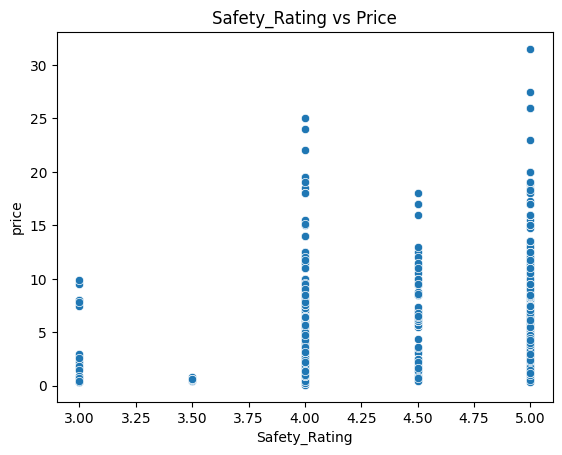

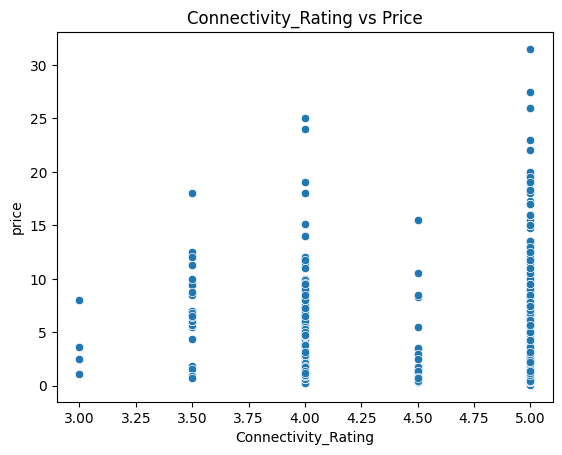

In [57]:
#how price is related to numerical columns
for col in numerical_features:
    sns.scatterplot(x=data_df[col], y=data_df['price'])
    plt.title(f"{col} vs Price")
    plt.show()

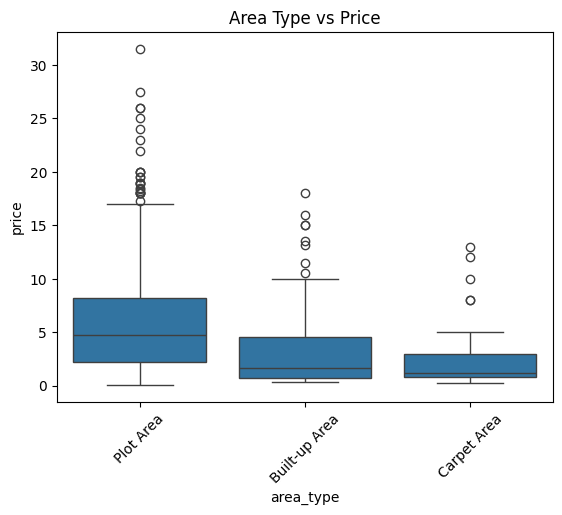

In [58]:
#to check if categorical data influence price
sns.boxplot(x=data_df['area_type'], y=data_df['price'])
plt.xticks(rotation=45)
plt.title("Area Type vs Price")
plt.show()

In [59]:
# Removing outliers in numerical features
# Define function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

house_df = remove_outliers_iqr(data_df, numerical_features)

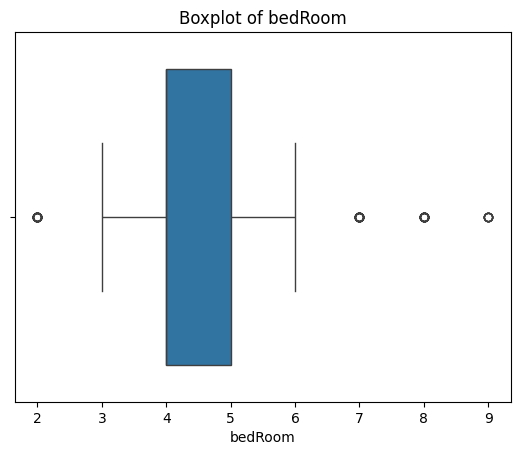

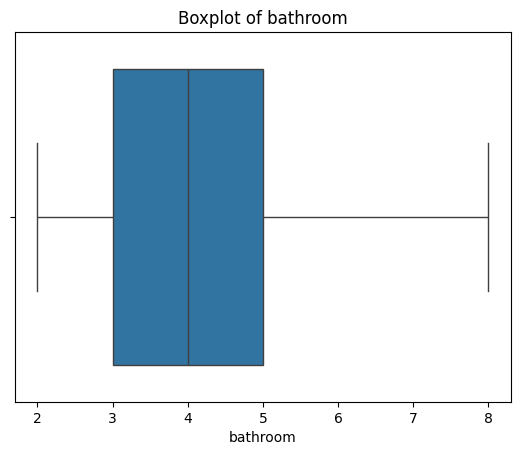

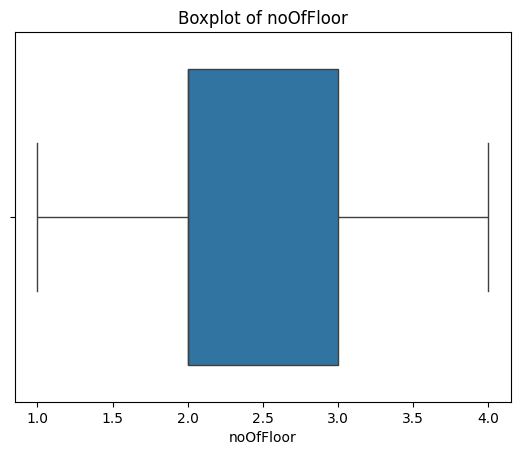

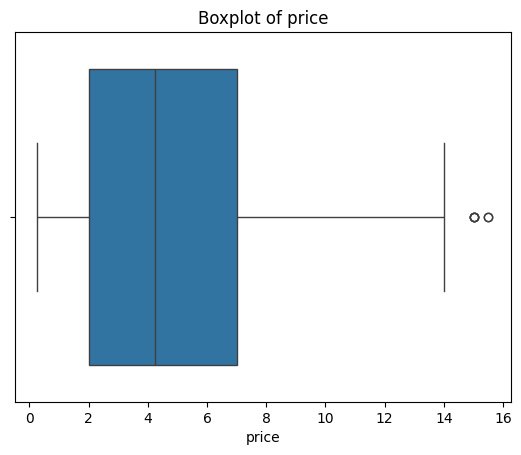

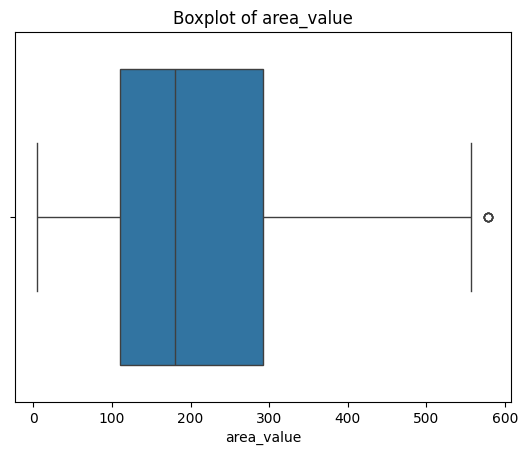

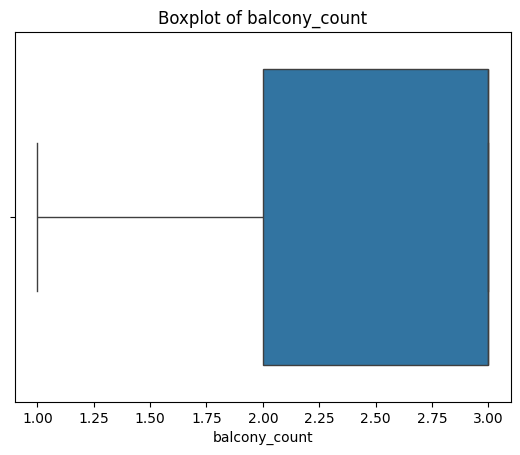

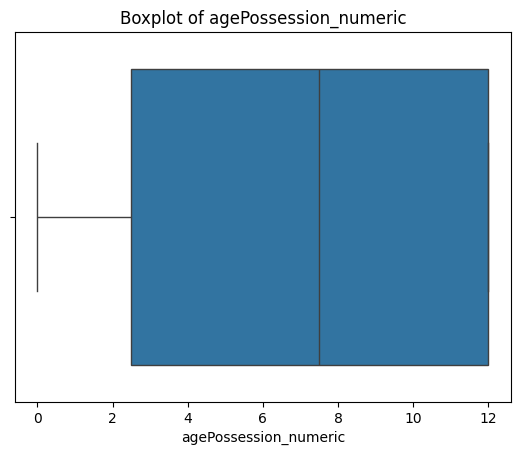

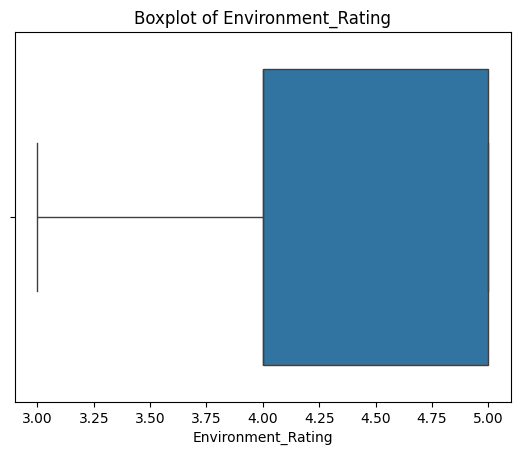

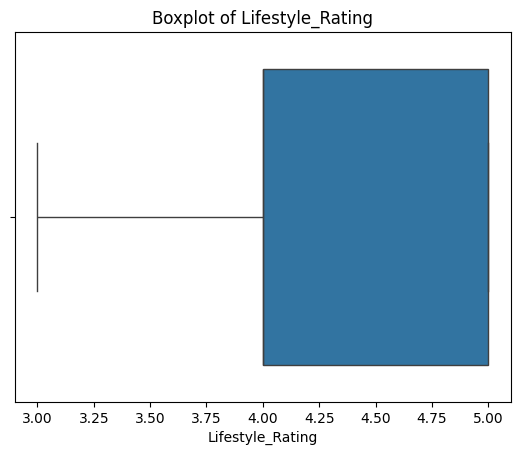

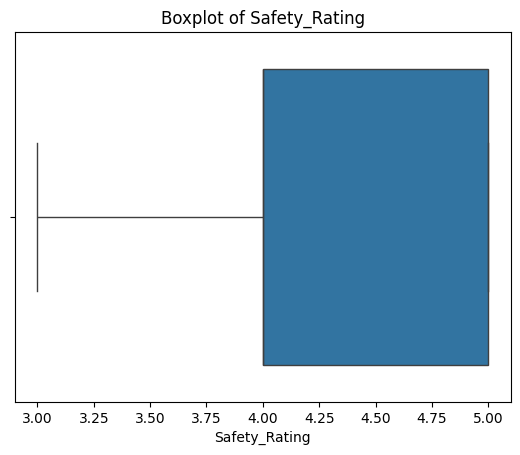

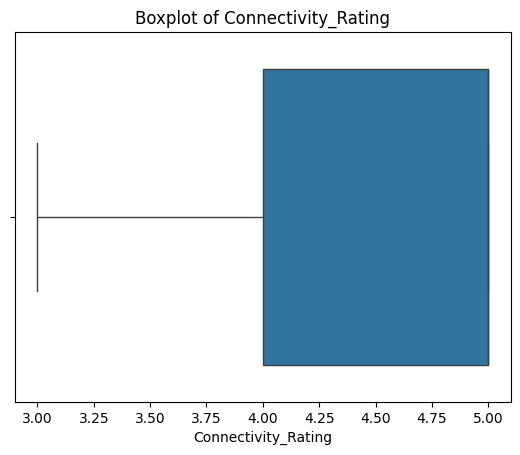

In [60]:
# To check outliers after applyiing IQR
for col in numerical_features:
    sns.boxplot(x=house_df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

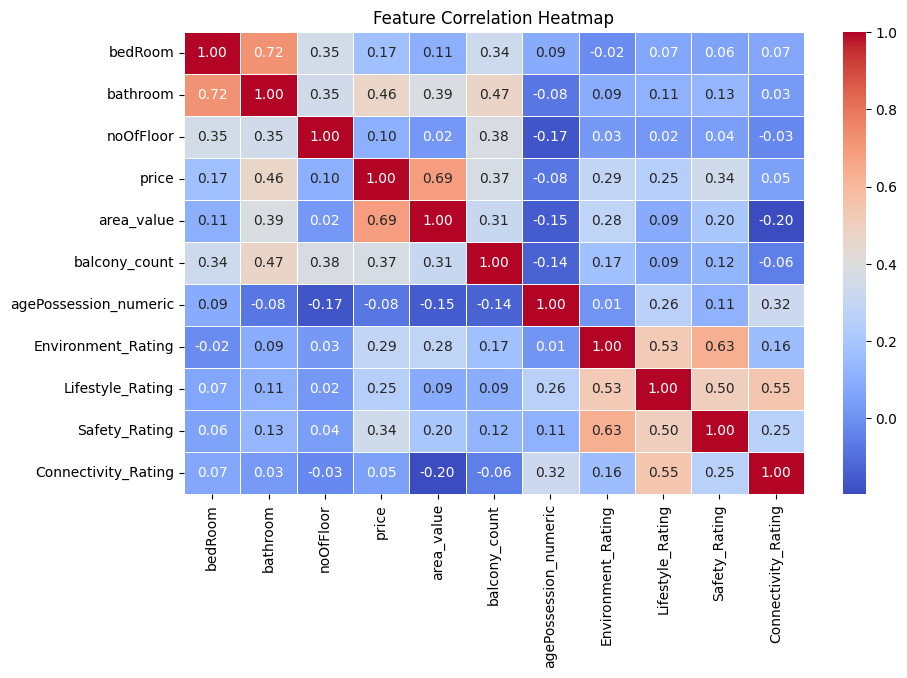

In [61]:
#Checking Correlation Between Features
# Compute correlation matrix
correlation_matrix = house_df[numerical_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [62]:
# To check correlation with target variable i.e price
correlation_with_target = house_df[numerical_features].corr()['price'].sort_values(ascending=False)
print("Correlation with Price:\n", correlation_with_target)

Correlation with Price:
 price                    1.000000
area_value               0.688681
bathroom                 0.463702
balcony_count            0.370776
Safety_Rating            0.343902
Environment_Rating       0.290949
Lifestyle_Rating         0.246156
bedRoom                  0.170622
noOfFloor                0.098642
Connectivity_Rating      0.047120
agePossession_numeric   -0.077636
Name: price, dtype: float64


In [63]:
#Checking Multicollinearity with Variance Inflation Factor (VIF)
X = house_df[numerical_features]
X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print(vif_data)

                  Feature         VIF
0                   const  166.380538
1                 bedRoom    2.458129
2                bathroom    3.099576
3               noOfFloor    1.330784
4                   price    2.448839
5              area_value    2.297061
6           balcony_count    1.489545
7   agePossession_numeric    1.254664
8      Environment_Rating    2.070473
9        Lifestyle_Rating    2.130131
10          Safety_Rating    1.911496
11    Connectivity_Rating    1.673936


Interpretation of VIF Values:

VIF = 1: No correlation with other variables (Ideal).
1 < VIF < 5: Moderate correlation, generally acceptable.
VIF > 5: High correlation, consider examining further.
VIF > 10: Very high correlation, problematic; consider removing or combining features.

In [64]:
house_df.isna().sum()

bedRoom                  0
bathroom                 0
noOfFloor                0
price                    0
area_value               0
area_type                0
balcony_count            0
agePossession_numeric    0
Environment_Rating       0
Lifestyle_Rating         0
Safety_Rating            0
Connectivity_Rating      0
dtype: int64

In [67]:
house_df.to_csv('housing_clean.csv')